In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [17]:
#Loading the dataset using pandas library
df1 = pd.read_csv("C:/Users/DELL/Desktop/banglore.csv")
df1.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [18]:
#Data Analysis starts now
df1['area_type'].unique()           # unique(): to find the unique values 

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [19]:
df1['area_type'].value_counts()                    #  value_counts(): this function is used to count the number of values in the each columns

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [20]:
#Removing Unnecessary Data which is not required in model building
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [21]:
df2.isnull().sum()                # isnull(): it is used to find the null values, sum(): is used to calculate the total number of null values in each column here


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [22]:
df2.shape                          #Total number of rows and columns in df2 (Data Frame 2).

(13320, 5)

In [23]:
df3 = df2.dropna()                  # dropna()= drop all the null values

In [24]:
df3.isnull().sum()                  #checks if any null values if left after performing dropna() operation.

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [25]:
df3.shape                         #After removing all the null values, total number of rows and columns in df3(Data Frame 3).

(13246, 5)

In [26]:
#In "size" column there is string value with numerical value. we only want numerical value i.e. we split each value of "size" column and store numerical value in another column calles "bhk".
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()


<ipython-input-26-fcfb4f2e5b3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [27]:
#Now we handle the column "total_sqft" because it has a range values
#Through is_float() function we determine which column has range values.

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [28]:
df3[~df3['total_sqft'].apply(is_float)].head(10)           # symbol(~) means not means except this condition

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [29]:
df3.info()        #Total summary of df3 (Data Frame 3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [30]:
#We store the index of range values in list (l)

j=0
l=[]
for i in df3["total_sqft"]:
    if '-' in i:
      l.append(j)
    j=j+1


In [31]:
l         #View contents of list l

[30,
 120,
 135,
 163,
 186,
 545,
 655,
 665,
 764,
 841,
 877,
 918,
 949,
 980,
 1168,
 1173,
 1177,
 1472,
 1530,
 1602,
 1631,
 1671,
 1681,
 2071,
 2111,
 2211,
 2247,
 2283,
 2378,
 2413,
 2555,
 2567,
 2693,
 2696,
 2894,
 2898,
 3150,
 3191,
 3332,
 3340,
 3443,
 3862,
 3919,
 3956,
 4094,
 4162,
 4197,
 4260,
 4467,
 4853,
 5146,
 5252,
 5340,
 5348,
 5563,
 5607,
 5622,
 5746,
 5811,
 5850,
 5871,
 5902,
 5945,
 5947,
 6018,
 6191,
 6236,
 6295,
 6346,
 6480,
 6539,
 6545,
 6600,
 6639,
 6725,
 6787,
 6940,
 7239,
 7364,
 7630,
 7668,
 7697,
 7747,
 7793,
 7911,
 7971,
 8034,
 8183,
 8256,
 8420,
 8665,
 8811,
 8813,
 8990,
 9086,
 9088,
 9103,
 9122,
 9139,
 9224,
 9238,
 9373,
 9414,
 9673,
 9751,
 9790,
 9987,
 10194,
 10287,
 10375,
 10403,
 10477,
 10504,
 10555,
 10640,
 10803,
 10828,
 10974,
 11110,
 11217,
 11304,
 11320,
 11338,
 11421,
 11428,
 11512,
 11579,
 11693,
 11756,
 11850,
 11898,
 12090,
 12113,
 12209,
 12263,
 12364,
 12473,
 12719,
 12882,
 12902,
 1

In [32]:
df3.iloc[l,:]               #Purely integer-location based indexing for selection by position.

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [33]:
# This is the main fuction to convert range values to numerical.
# To explain this function we take an example

# let

# 2-4 this is the range value in the column

# then,

# 2+4)/2
# =3

# then this 3 value store in the column in place of the range



def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [34]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [35]:
df4.loc[122]        #showing with example how above function worked perfectly

location      Hebbal
size           4 BHK
total_sqft    5611.5
bath               4
price            477
bhk                4
Name: 122, dtype: object

In [36]:
(3067+8156)/2             #3067-8156 range was given before performing the function.. now if we apply the logic the answer will be 5611.5

5611.5

In [37]:
#Now we find the price per square feet by dividing price by total square feet.
#Price is given in lakhs,so, we have to convert it in rupees by multiply 100000 to price

df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [38]:
df5.iloc[310]

location          Kanakpura Road
size                       3 BHK
total_sqft                  1550
bath                           3
price                         67
bhk                            3
price_per_sqft           4322.58
Name: 313, dtype: object

In [39]:
df5_stats = df5['price_per_sqft'].describe()         #calculating mathematical statistics of price per square feet
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [40]:
#now to reduce the number of cities, we convert the city that occurs less than 10 in the whole data we named it as "others"
#We find the count of each location

df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Bande Nallasandra         1
Lalbagh Road              1
Allalasandra              1
ITI Employees Layout      1
sarjapura main road       1
Name: location, Length: 1287, dtype: int64

In [41]:
location_stats.values.sum()

13200

In [42]:
len(location_stats[location_stats>10])            #locations occuring more than 10 times in dataset.

240

In [43]:
len(location_stats)                               #Total number of locations in dataset.

1287

In [44]:
len(location_stats[location_stats<=10])           #locations occuring less than or equal to 10 times in dataset.

1047

In [45]:
location_stats_less_than_10 = location_stats[location_stats<=10]                #All locations which are occuring less than or equal to 10 times in dataset.
location_stats_less_than_10

Nagadevanahalli         10
Nagappa Reddy Layout    10
Dairy Circle            10
BTM 1st Stage           10
Thyagaraja Nagar        10
                        ..
Bande Nallasandra        1
Lalbagh Road             1
Allalasandra             1
ITI Employees Layout     1
sarjapura main road      1
Name: location, Length: 1047, dtype: int64

In [46]:
len(df5.location.unique())

1287

In [47]:
#Now we convert all the locations that has count less than or equal to 10 to "other" category

df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [48]:
df5.head(10)                      #Now this new updated dataframe 5 has all locations which are occuring more than 10 times.

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [49]:
#    REMOVING OUTLIERS
# We know that the total square feet for 1BHK should be greater than 300.
# In the below cells we remove the cells which have less than 300 square feet for 1BHK

df5[df5.total_sqft/df5.bhk<300].head()




,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [50]:
df5.shape

(13200, 7)

In [51]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]                    #In df6 (dataframe 6) we include all data of df5 except(~) those having total sqft for 1 BHK less than 300.
df6.shape                                                   #Total rows and columns in new df6

(12456, 7)

In [52]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [53]:
df6.groupby('location')

In [54]:
#Removing price per square fit (pps) outliers

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
        #print(key)
    print(subdf)
    print(df_out)
    return df_out
    
df7 = remove_pps_outliers(df6)
df7.shape

      location       size  total_sqft  bath   price  bhk  price_per_sqft
18       other      3 BHK      2770.0   4.0  290.00    3    10469.314079
19       other      2 BHK      1100.0   2.0   48.00    2     4363.636364
25       other      3 BHK      1250.0   3.0   56.00    3     4480.000000
42       other      1 BHK       600.0   1.0   38.00    1     6333.333333
49       other      2 BHK       869.0   2.0   36.00    2     4142.692750
...        ...        ...         ...   ...     ...  ...             ...
13291    other  1 Bedroom       812.0   1.0   26.00    1     3201.970443
13292    other      3 BHK      1440.0   2.0   63.93    3     4439.583333
13302    other      2 BHK      1075.0   2.0   48.00    2     4465.116279
13306    other  4 Bedroom      1200.0   5.0  325.00    4    27083.333333
13316    other      4 BHK      3600.0   5.0  400.00    4    11111.111111

[2557 rows x 7 columns]
                  location       size  total_sqft  bath   price  bhk  \
0      1st Block Jayanagar 

(10242, 7)

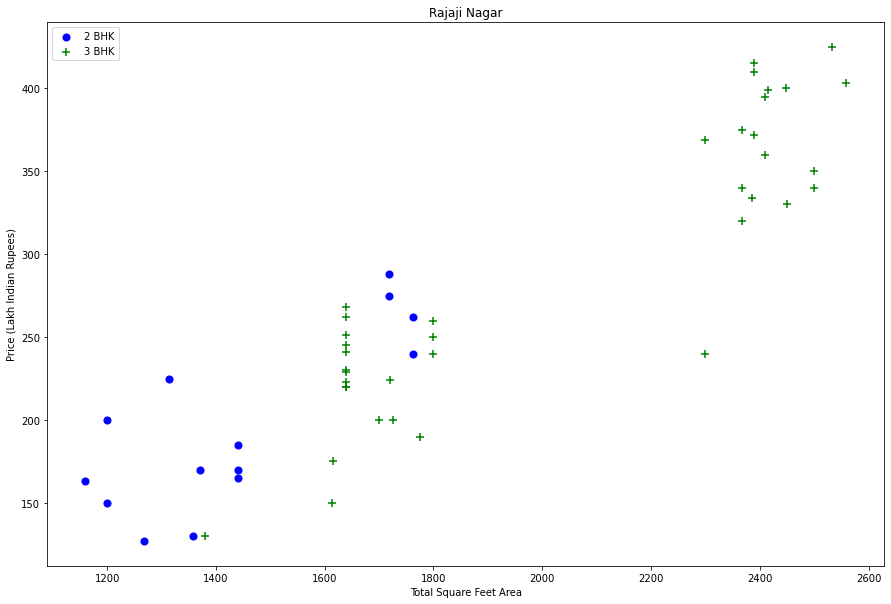

In [55]:
#Generating scatter chart according to different locations

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")             #First we take Rajaji nagar as location and see the scatter chart.

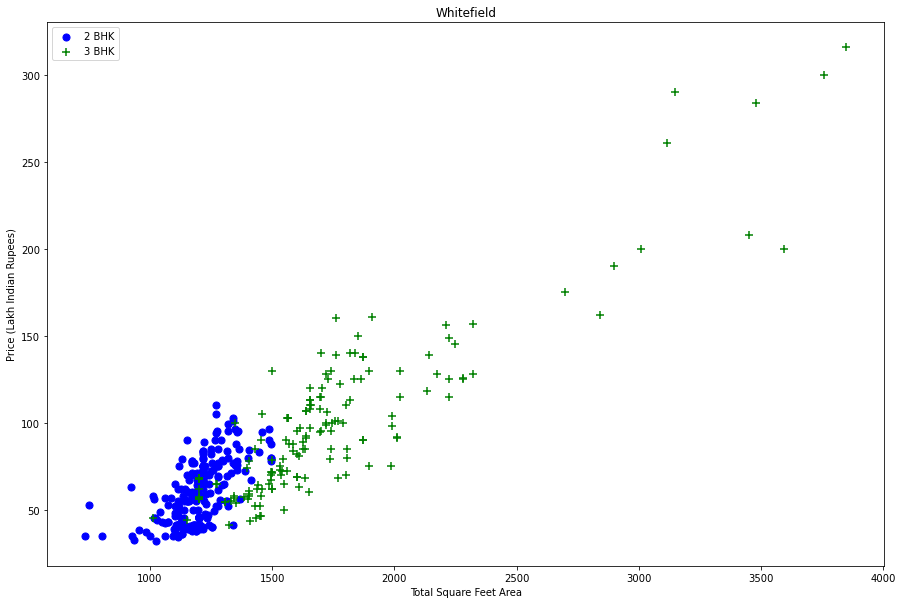

In [56]:
plot_scatter_chart(df7,"Whitefield")               #Now we check for Whitefield location.

In [57]:
#Here we are having a BHK Outlier i.e Price of 3bhk is less than 2 bhk price for same square feet Area. So we renove that outlier.

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

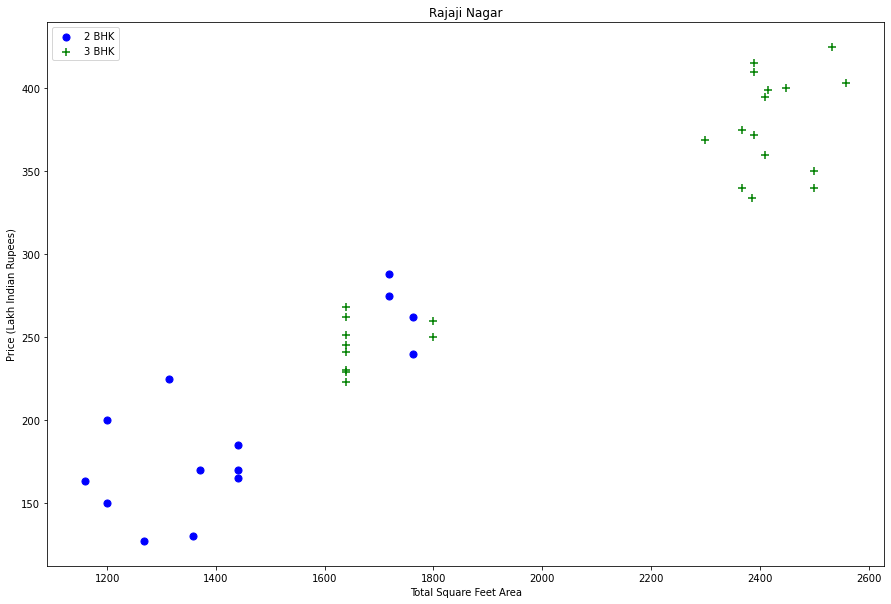

In [58]:
plot_scatter_chart(df8,"Rajaji Nagar")

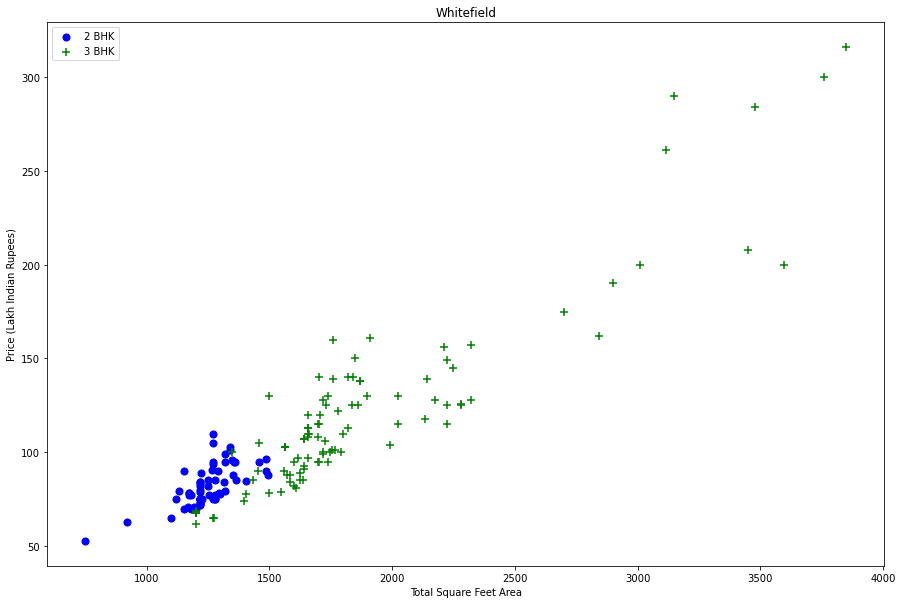

In [59]:
plot_scatter_chart(df8,"Whitefield")

Text(0, 0.5, 'Count')

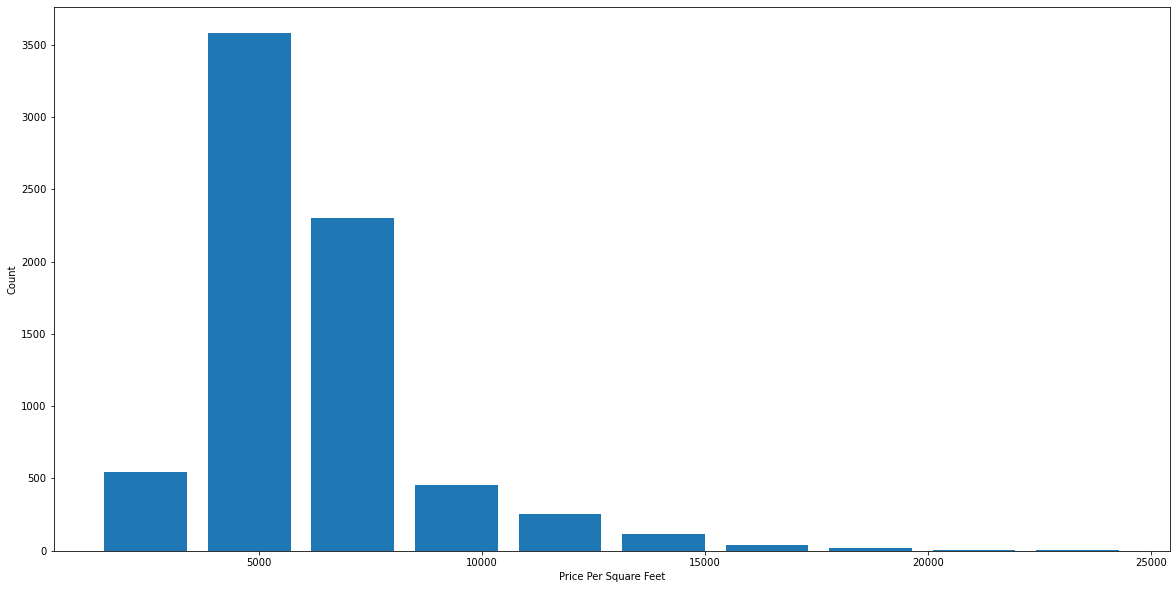

In [60]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)         #Histogram for price per sqft and count
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [61]:
#Outlier removal using Bathroom feature.
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

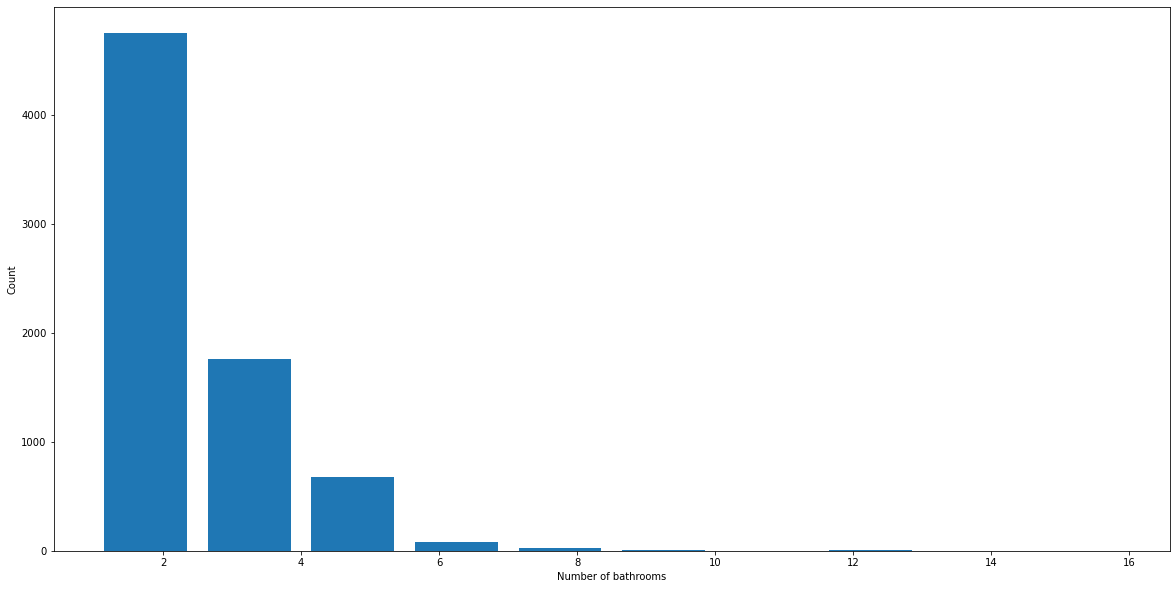

In [62]:
plt.hist(df8.bath,rwidth=0.8)                 #Histogram for no. of bathrooms and count
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [63]:
df8[df8.bath>10]               #All data where bathrooms are more than 10

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [64]:
df8[df8.bath>df8.bhk+2]               #Bathrooms cannot be more than the BHK of that house.

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [65]:
df9 = df8[df8.bath<df8.bhk+2]             #In above data we see that there are 7 bathrooms for a 4 BHK house, which is not usual. So we remove that and in df9 we have the data where bathrooms are less than or equal to BHK of that house.
df9.shape

(7239, 7)

In [66]:
df9.head(2)          #This is the new data where we can see bathrooms are less than or equal to BHK.

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [67]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [68]:
#Now we need to convert Categorical Data(location) to Numerical Data
#So we use One Hot Encoding here.

dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')     #We drop 'other' column now
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df12 = df11.drop('location',axis='columns')          #We drop 'location' column now
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df12.shape                     #Total rows and column in df12(data frame 12).

(7239, 244)

In [72]:
X = df12.drop(['price'],axis='columns')          #We drop 'price' column now 
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X.shape

(7239, 243)

In [97]:
y = df12.price
y.head

<bound method NDFrame.head of 0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10233     70.0
10234    200.0
10237    110.0
10238     26.0
10241    400.0
Name: price, Length: 7239, dtype: float64>

In [75]:
len(y)

7239

In [76]:
#Performing Train test split on the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [77]:
#Performing Linear Regression Algorithm on the train dataset

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)

LinearRegression()

In [87]:
print(lr_clf.intercept_)
print(lr_clf.coef_)

-3.132417852503039
[ 8.01179032e-02  3.71694671e+00 -1.50202644e+00  1.20968537e+02
  2.45037670e+00 -5.29380959e+01  1.02788383e+02 -7.03146246e+01
 -3.89299631e+01 -1.85179731e+01 -1.81540697e+01 -4.72181903e+01
 -4.55005897e+01 -3.59209534e+01 -5.25789908e+01 -4.21299763e+01
 -2.79617748e+01 -2.96745769e+01 -3.37243927e+01 -4.30523354e+01
 -4.63572753e+01 -3.53450116e+01 -5.04870285e+01 -4.31831077e+01
 -3.37223267e+01 -3.49151967e+01 -1.91070208e+01  4.95276158e+00
 -4.11542129e+01 -5.20629169e+01 -2.93242196e+01 -1.62662047e+01
 -3.25217236e+01  8.45740507e+01 -3.40426878e+01 -6.15425453e+01
 -6.13320691e+01 -3.06144991e+01 -3.36020349e+01 -1.34178998e+01
 -3.20742334e+01  2.94946931e+01 -3.20698342e-01 -4.93174749e+01
 -4.54625244e+01 -5.58189272e+01 -3.31242244e+01  1.19335410e+02
 -4.54819617e+01 -3.09336005e+01 -2.33894756e+01  1.00442670e-02
 -3.86470982e+01 -4.55335854e+01 -4.69654900e+01 -5.92550733e+01
  4.16783456e+00 -2.01314575e+01 -3.95753039e+01 -3.16579360e+01
  1.94

In [92]:
y_pred = lr_clf.predict(X_test)
print(y_pred)

[123.68919775  79.12643295  76.7573612  ...  58.55465139  99.4418541
 135.74127115]


In [98]:
from sklearn import metrics
print(metrics.mean_squared_error(y.head(1448),y_pred))

11660.102752346509


In [91]:
#Using K Fold cross validation to measure accuracy of our LinearRegression model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [79]:
#Finally testing the model for output

def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]


In [80]:
predict_price('1st Phase JP Nagar',1000, 2, 2)             #1000 is sqft, 2 is bathrooms and the last 2 is BHK.

83.86570258311215

In [81]:
predict_price('Whitefield',2340, 3, 4)                    #Output is 161.79 Lakh which is 1 Crore 61 Lakh 79 Thousand

161.79725619138318

In [82]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [83]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [84]:
pwd

'C:\\Users\\DELL\\Desktop\\ML PROJECT'